In [1]:
import os
import sys
import itertools
import uproot
import ROOT
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

sys.path.append(os.path.expandvars("$HOME/Software/WCSimFQTuningTools/STable/"))
from STable_tools import read_stable, split_tubeids, read_wcsim_geometry

from os.path import expandvars

Welcome to JupyROOT 6.28/11


In [2]:
ROOT.gROOT.SetMacroPath(expandvars("$HOME/Software/fiTQun/install-Linux_x86_64-gcc_9-python_3.10.13/lib/"))
ROOT.gROOT.LoadMacro("libfiTQunLib.so")

0

In [3]:
fname  = expandvars("$LUSTRE/STable/tuning/scattables.root")

tables = read_stable(fname)

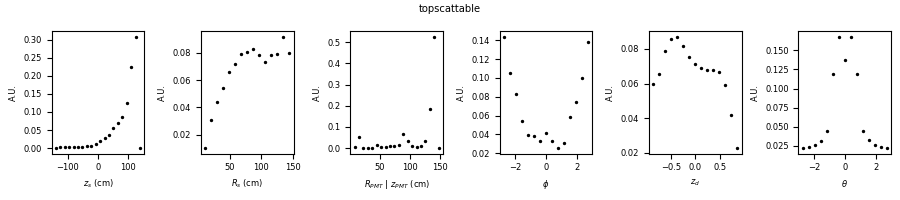

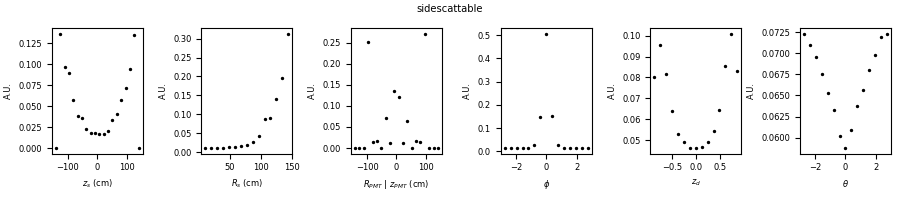

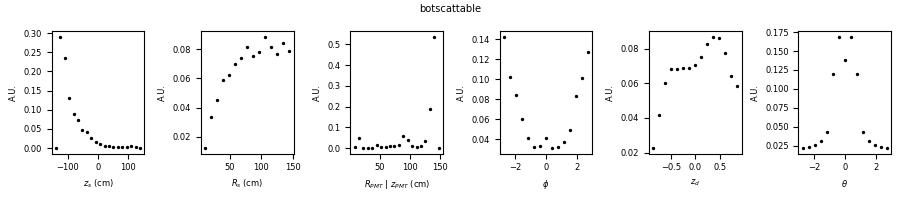

In [14]:
dims = list(range(6))
vars = {0:r"$z_s$ (cm)", 1:r"$R_s$ (cm)", 2:r"$R_{PMT} ~|~ z_{PMT}$ (cm)", 3:r"$\phi$", 4:r"$z_d$", 5:r"$\theta$"}

plt.rcParams["font.size"] = 6

for name in ["topscattable", "sidescattable", "botscattable"]:
    tab  =  tables[name]
    bins = tables[f"{name}_bins"]

    plt.figure(figsize=[9, 2])
    plt.suptitle(name)
    for pax in range(0, 6):

        nbins  = bins[0][pax]
        bounds = bins[1][pax]
        dx = (bounds[-1] - bounds[0])/nbins
        x = np.linspace(bounds[0]+dx, bounds[-1]-dx, nbins)

        plt.subplot(1, 6, pax+1)
        proj = tab.sum(axis=tuple(np.delete(dims, pax)))
        plt.scatter(x, proj/np.sum(proj), color="k", s=2)

        plt.xlabel(vars[pax])
        plt.ylabel("A.U.")
    plt.tight_layout()